In [1]:
from systems import *
from power import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 6 Barras

In [2]:
i14 = ieee14bus()
solver = AC_PF(i14)
solver.solve(verbose=True)

 
=== Iteration 0 === 
Bus 1: P = 0.1447pu, Q = 0.4547pu, V = 1.0600pu, theta = 0.0000°
Bus 2: P = 0.1224pu, Q = 0.3287pu, V = 1.0450pu, theta = 0.0000°
Bus 3: P = -0.0201pu, Q = -0.1578pu, V = 1.0100pu, theta = 0.0000°
Bus 4: P = -0.0957pu, Q = -0.1540pu, V = 1.0000pu, theta = 0.0000°
Bus 5: P = -0.1381pu, Q = -0.5232pu, V = 1.0000pu, theta = 0.0000°
Bus 6: P = 0.4928pu, Q = 0.9890pu, V = 1.0700pu, theta = 0.0000°
Bus 7: P = 0.0000pu, Q = -0.6185pu, V = 1.0000pu, theta = 0.0000°
Bus 8: P = 0.0000pu, Q = 0.5569pu, V = 1.0900pu, theta = 0.0000°
Bus 9: P = -0.0000pu, Q = -0.2475pu, V = 1.0000pu, theta = 0.0000°
Bus 10: P = -0.0000pu, Q = 0.0000pu, V = 1.0000pu, theta = 0.0000°
Bus 11: P = -0.1369pu, Q = -0.2866pu, V = 1.0000pu, theta = 0.0000°
Bus 12: P = -0.1068pu, Q = -0.2223pu, V = 1.0000pu, theta = 0.0000°
Bus 13: P = -0.2169pu, Q = -0.4272pu, V = 1.0000pu, theta = 0.0000°
Bus 14: P = 0.0000pu, Q = 0.0000pu, V = 1.0000pu, theta = 0.0000°
 
=== Iteration 1 === 
Bus 1: P = 2.2151pu, Q 

In [3]:
print(flowac_from)
print(flowac_to)

NameError: name 'flowac_from' is not defined

In [ ]:
# Flow AC
sauer6 = sauer6bus()
solver = AC_PF(sauer6)
solver.solve(verbose=True)
theta_ac = solver.theta

 
=== Iteration 0 === 
Bus 1: P = 0.0521pu, Q = 0.2311pu, V = 1.0500pu, theta = 0.0000°
Bus 2: P = 0.1124pu, Q = 0.2150pu, V = 1.1000pu, theta = 0.0000°
Bus 3: P = -0.0445pu, Q = 0.1188pu, V = 1.0000pu, theta = 0.0000°
Bus 4: P = -0.0279pu, Q = -0.3083pu, V = 1.0000pu, theta = 0.0000°
Bus 5: P = -0.0577pu, Q = 0.1725pu, V = 1.0000pu, theta = 0.0000°
Bus 6: P = -0.0217pu, Q = -0.3675pu, V = 1.0000pu, theta = 0.0000°
 
=== Iteration 1 === 
Bus 1: P = 0.8759pu, Q = 0.2238pu, V = 1.0500pu, theta = -0.0000°
Bus 2: P = 0.4831pu, Q = 0.2841pu, V = 1.1000pu, theta = -3.6870°
Bus 3: P = -0.5089pu, Q = -0.1004pu, V = 0.9437pu, theta = -12.0593°
Bus 4: P = -0.0143pu, Q = 0.0382pu, V = 0.9801pu, theta = -9.0979°
Bus 5: P = -0.2684pu, Q = -0.1337pu, V = 0.8941pu, theta = -11.2157°
Bus 6: P = -0.4751pu, Q = -0.0210pu, V = 0.9755pu, theta = -11.2481°
 
=== Iteration 2 === 
Bus 1: P = 0.9594pu, Q = 0.3603pu, V = 1.0500pu, theta = -0.0000°
Bus 2: P = 0.5003pu, Q = 0.3595pu, V = 1.1000pu, theta = -5.544

In [ ]:
flowac_from, flowac_to = solver.get_line_flows()
print("AC Line Flows:")
print(flowac_from)
print(flowac_to)

AC Line Flows:
[0.51249814 0.45286836 0.18306159 0.31693841 0.09954755 0.20019901
 0.20019901 0.0195825  0.00838131]
[-0.48991767 -0.42688449 -0.15936778 -0.27457836 -0.09821724 -0.20019901
 -0.20019901 -0.0195825  -0.00838131]


In [ ]:
solver_dc = DC_PF(sauer6)
theta_dc = solver_dc.solve()
print(theta_dc)
flow_dc = solver_dc.get_line_flows()
print("DC Line Flows:")
print(flow_dc)

[  0.          -0.55133947 -12.27911925  -9.57345175 -11.73762791
 -11.82449927]
DC Line Flows:
[ 0.45158988  0.39841012  0.19494131  0.30505869  0.09653118  0.17752935
  0.17752935 -0.0035425  -0.00151619]


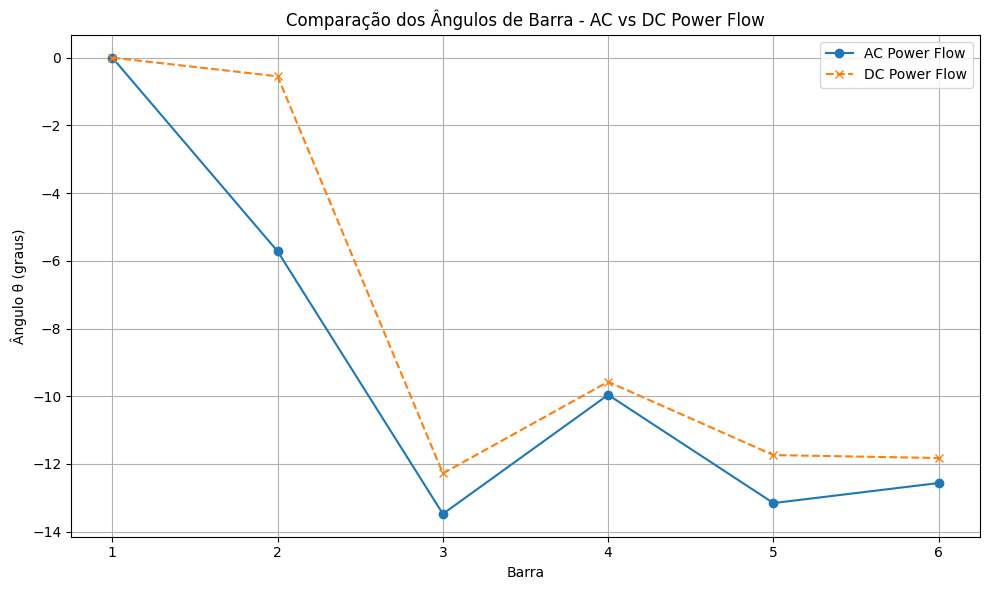

In [ ]:
# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
sauer6 =  sauer6bus()
# Cálculo dos índices CTDF e flows
P = [sauer6.buses[i].p for i in range(len(sauer6.buses))]

# CTDF ground:
T_ground = sauer6.CTDF()
flow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = sauer6.CTDF(ref_bus=sauer6.buses[0])
flow_slack = np.real(np.dot(T_slack, P))
# CTDF z_tie:
T_tie = sauer6.CTDF(ref_bus=sauer6.buses[0], z_tie=1j)
flow_tie = np.real(np.dot(T_tie, P))


In [ ]:
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(sauer6.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, flow_ac, marker='o', label='Flow AC')
plt.plot(linhas, flow_dc, marker='o', label='Flow DC')
#plt.plot(linhas, flow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('AC Power Flow vs DC Power Flow vs Estimativa CTDF')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'flow_ac' is not defined

<Figure size 1000x600 with 0 Axes>

# 11 Bus

In [ ]:
s11 = sauer11bus()
solver = AC_PF(s11)
solver.solve(verbose=True)

 
=== Iteration 0 === 
Bus 1: P = 0.1232pu, Q = 1.3753pu, V = 1.0200pu, theta = 0.0000°
Bus 2: P = 0.0000pu, Q = -0.4130pu, V = 1.0000pu, theta = 0.0000°
Bus 3: P = -0.1208pu, Q = -2.8808pu, V = 1.0000pu, theta = 0.0000°
Bus 4: P = 0.0000pu, Q = -0.4380pu, V = 1.0000pu, theta = 0.0000°
Bus 5: P = 0.0000pu, Q = -0.1138pu, V = 1.0000pu, theta = 0.0000°
Bus 6: P = -0.0000pu, Q = -0.1730pu, V = 1.0000pu, theta = 0.0000°
Bus 7: P = 0.0000pu, Q = -0.0514pu, V = 1.0000pu, theta = 0.0000°
Bus 8: P = 0.0000pu, Q = -0.2250pu, V = 1.0000pu, theta = 0.0000°
Bus 9: P = 0.0000pu, Q = -0.0217pu, V = 1.0000pu, theta = 0.0000°
Bus 10: P = 0.0000pu, Q = -0.0153pu, V = 1.0000pu, theta = 0.0000°
Bus 11: P = 0.0000pu, Q = -0.1329pu, V = 1.0000pu, theta = 0.0000°
 
=== Iteration 1 === 
Bus 1: P = -0.3468pu, Q = -3.9905pu, V = 1.0200pu, theta = 0.0000°
Bus 2: P = -0.4263pu, Q = -0.0485pu, V = 1.0781pu, theta = -1.0730°
Bus 3: P = -0.1910pu, Q = 0.1845pu, V = 1.0598pu, theta = 0.0611°
Bus 4: P = -0.0650pu, Q 

In [ ]:
# Flow AC
sauer11 = sauer11bus()
solver = AC_PF(sauer11)
solver.solve(verbose=True)
theta_ac = solver.theta

 
=== Iteration 0 === 
Bus 1: P = 0.1232pu, Q = 1.3753pu, V = 1.0200pu, theta = 0.0000°
Bus 2: P = 0.0000pu, Q = -0.4130pu, V = 1.0000pu, theta = 0.0000°
Bus 3: P = -0.1208pu, Q = -2.8808pu, V = 1.0000pu, theta = 0.0000°
Bus 4: P = 0.0000pu, Q = -0.4380pu, V = 1.0000pu, theta = 0.0000°
Bus 5: P = 0.0000pu, Q = -0.1138pu, V = 1.0000pu, theta = 0.0000°
Bus 6: P = -0.0000pu, Q = -0.1730pu, V = 1.0000pu, theta = 0.0000°
Bus 7: P = 0.0000pu, Q = -0.0514pu, V = 1.0000pu, theta = 0.0000°
Bus 8: P = 0.0000pu, Q = -0.2250pu, V = 1.0000pu, theta = 0.0000°
Bus 9: P = 0.0000pu, Q = -0.0217pu, V = 1.0000pu, theta = 0.0000°
Bus 10: P = 0.0000pu, Q = -0.0153pu, V = 1.0000pu, theta = 0.0000°
Bus 11: P = 0.0000pu, Q = -0.1329pu, V = 1.0000pu, theta = 0.0000°
 
=== Iteration 1 === 
Bus 1: P = -0.3468pu, Q = -3.9905pu, V = 1.0200pu, theta = 0.0000°
Bus 2: P = -0.4263pu, Q = -0.0485pu, V = 1.0781pu, theta = -1.0730°
Bus 3: P = -0.1910pu, Q = 0.1845pu, V = 1.0598pu, theta = 0.0611°
Bus 4: P = -0.0650pu, Q 

In [ ]:
flowac_from, flowac_to = solver.get_line_flows()
print("AC Line Flows:")
print(flowac_from)
print(flowac_to)

AC Line Flows:
[ 0.04488552  0.0921149   0.09914162 -0.4644388  -0.35156776 -0.28664539
 -1.12893988 -0.22146769  0.38285662 -0.34919388 -1.05861683 -0.19037176
 -0.52040513]
[ 0.37039047  0.36795276  0.82940444  1.16306528  0.68241378  0.28676861
  1.25747076  0.26956326 -0.38285662  0.41653753  1.05861683  0.60228278
  0.80637249]


In [ ]:
flow_ac = solver.get_line_flows()
print("AC Line Flows:")
print(flow_ac)

AC Line Flows:
(array([ 0.04488552,  0.0921149 ,  0.09914162, -0.4644388 , -0.35156776,
       -0.28664539, -1.12893988, -0.22146769,  0.38285662, -0.34919388,
       -1.05861683, -0.19037176, -0.52040513]), array([ 0.37039047,  0.36795276,  0.82940444,  1.16306528,  0.68241378,
        0.28676861,  1.25747076,  0.26956326, -0.38285662,  0.41653753,
        1.05861683,  0.60228278,  0.80637249]))


In [ ]:
solver_dc = DC_PF(sauer11)
theta_dc = solver_dc.solve()
print(theta_dc)
flow_dc = solver_dc.get_line_flows()
print("DC Line Flows:")
print(flow_dc)

[ 0.         -0.84415906  0.21301682  1.80615462 15.38427013  2.26636207
 12.98849371 14.6928917  15.33365437 14.74946412 15.01507733]
DC Line Flows:
[-0.17537004 -0.15362996 -0.372      -0.835      -0.52842995 -0.30657005
 -1.205      -0.23108821  0.36808821 -0.36808821 -1.07391179 -0.396
 -0.67791179]


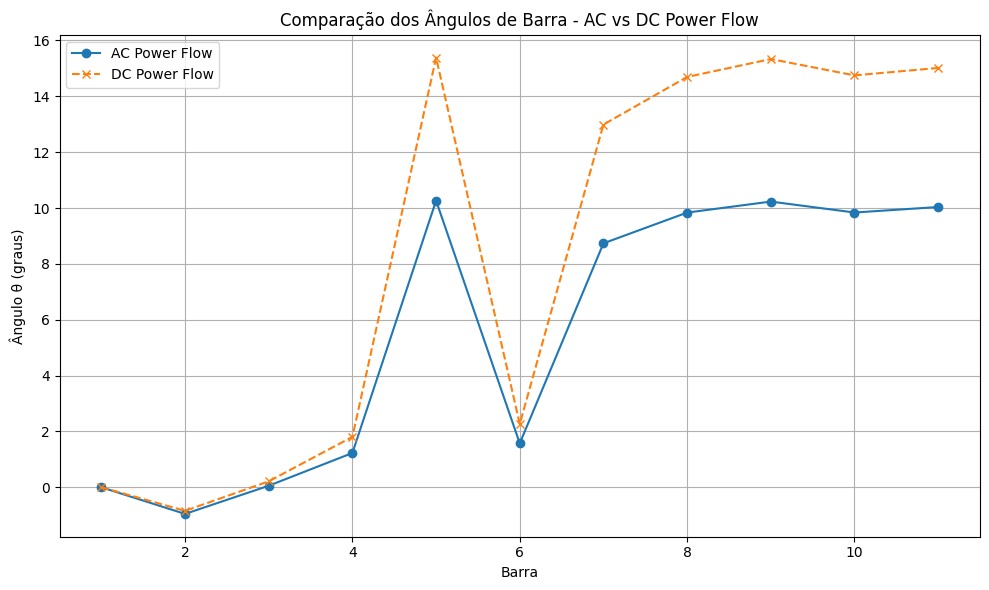

In [ ]:
# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
sauer11 = sauer11bus()
# Cálculo dos índices CTDF e flows
P = [sauer11.buses[i].p for i in range(len(sauer11.buses))]

# CTDF ground:
T_ground = sauer11.CTDF()
flow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = sauer11.CTDF(ref_bus=sauer11.buses[0])
flow_slack = np.real(np.dot(T_slack, P))
# CTDF z_tie:
T_tie = sauer11.CTDF(ref_bus=sauer11.buses[0], z_tie=1j)
flow_tie = np.real(np.dot(T_tie, P))

In [ ]:
print(sauer11.buses)

[Bus(id=1, type=Slack, v=1.020 pu, theta=0.000 rad, p=0.000 pu, q=0.000 pu, shunt=0.000+0.000j pu, gen=1, load=0), Bus(id=2, type=PQ, v=1.000 pu, theta=0.000 rad, p=-0.372 pu, q=-0.083 pu, shunt=0.000+0.000j pu, gen=0, load=1), Bus(id=3, type=PQ, v=1.000 pu, theta=0.000 rad, p=-0.134 pu, q=-0.016 pu, shunt=0.000+0.000j pu, gen=0, load=1), Bus(id=4, type=PQ, v=1.000 pu, theta=0.000 rad, p=0.000 pu, q=0.000 pu, shunt=0.000+0.000j pu, gen=0, load=0), Bus(id=5, type=PQ, v=1.000 pu, theta=0.000 rad, p=1.046 pu, q=0.112 pu, shunt=0.000+0.000j pu, gen=0, load=1), Bus(id=6, type=PQ, v=1.000 pu, theta=0.000 rad, p=-0.370 pu, q=-0.012 pu, shunt=0.000+0.000j pu, gen=0, load=1), Bus(id=7, type=PQ, v=1.000 pu, theta=0.000 rad, p=-0.100 pu, q=-0.007 pu, shunt=0.000+0.000j pu, gen=0, load=1), Bus(id=8, type=PQ, v=1.000 pu, theta=0.000 rad, p=0.000 pu, q=0.000 pu, shunt=0.000+0.000j pu, gen=0, load=0), Bus(id=9, type=PQ, v=1.000 pu, theta=0.000 rad, p=0.000 pu, q=0.000 pu, shunt=0.000+0.000j pu, gen=0

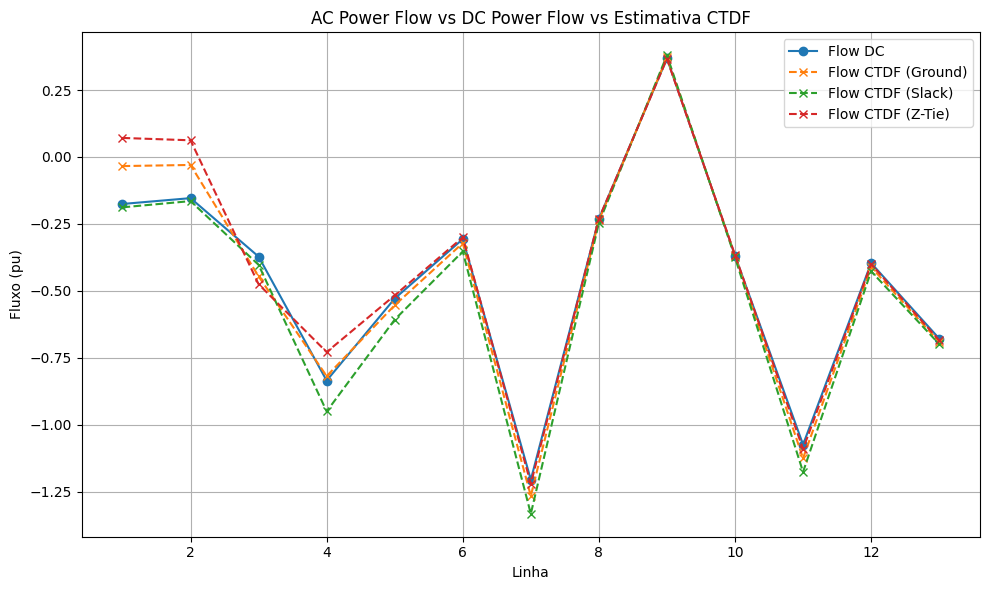

In [ ]:
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(sauer11.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
#plt.plot(linhas, flow_ac, marker='o', label='Flow AC')
plt.plot(linhas, flow_dc, marker='o', label='Flow DC')
plt.plot(linhas, flow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('AC Power Flow vs DC Power Flow vs Estimativa CTDF')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
net3 = test2bus()
solver = DC_PF(net3)
theta = solver.solve()
print("DC Power Flow Angles:")
print(theta)
flow = solver.get_line_flows()
print("DC Line Flows:")
print(flow)

net3 = test2bus()
P = [net3.buses[i].p for i in range(len(net3.buses))]
#Ctdf slack ref
T = net3.CTDF(ref_bus=net3.buses[0])
print(T)
flows = np.dot(T, P)
print(flows)
print(abs(flows))

DC Power Flow Angles:
[ 0.         -2.86478898]
DC Line Flows:
[0.5]
[[ 0.+0.j -1.-0.j]]
[0.5+0.j]
[0.5]


In [ ]:
net3 = test3bus()
solver = DC_PF(net3)
theta = solver.solve()
print("DC Power Flow Angles:")
print(theta)
flow = solver.get_line_flows()
print("DC Line Flows:")
print(flow)

net3 = test3bus()
P = [net3.buses[i].p for i in range(len(net3.buses))]
#Ctdf slack ref
T = net3.CTDF(ref_bus=net3.buses[0])
print(T)
flows = np.dot(T, P)
print("Flows do CTDF")
print(flows)


DC Power Flow Angles:
[ 0.         -2.38732415 -1.90985932]
DC Line Flows:
[ 0.41666667  0.33333333 -0.08333333]
[[ 0.        +0.j -0.66666667-0.j -0.33333333-0.j]
 [ 0.        +0.j -0.33333333-0.j -0.66666667-0.j]
 [ 0.        +0.j  0.33333333+0.j -0.33333333-0.j]]
Flows do CTDF
[ 0.41666667+0.j  0.33333333+0.j -0.08333333+0.j]
